<a href="https://colab.research.google.com/github/RITIK1442840127/Cardiovascular-Risk-Prediction-/blob/main/Capstone_Project_3_Cardiovascular_Risk_Prediction_Ritik_Tiwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.

**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# <b> <u>Variable Description</u></b>

**Demographic:**
*  **Sex**: male or female("M" or "F")

*  **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -DV



---



**Importing Required Libraries**

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

## **Reading the Data**

In [4]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("/content/data_cardiovascular_risk.csv")

In [5]:
# print first 5 rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# print last 5 rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
# number of rows and columns in the dataset
df.shape

(3390, 17)

In [8]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Data Preprocessing and Basic EDA**

We drop the education and id columns because it has no correlation with heart disease.

In [9]:
# Removing columns such as 'id' & 'education' 
df.drop(['id','education'],axis=1,inplace=True)

In [10]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


 Before we go ahead, an important step to do is to convert our string feature  into an integer.
 
  We will name 

*   In **sex** feature  **M** will be converted to 1 and **F** will be converted to 0.
*   In **is_smoking** feature  **YES** will be converted to 1 and **NO** will be converted to 0.


In [11]:
# Applying function to convert string data to an integer
df['sex'] = df['sex'].apply(lambda x : 1 if x == "M" else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [12]:
# checking the distribution
df['sex'].value_counts()

0    1923
1    1467
Name: sex, dtype: int64

In [13]:
# checking the distribution
df['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


In [15]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Missing Value Analysis** 

 Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [16]:
# checking for missing values
df.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

 The next single-line code will visualize the location of missing values.

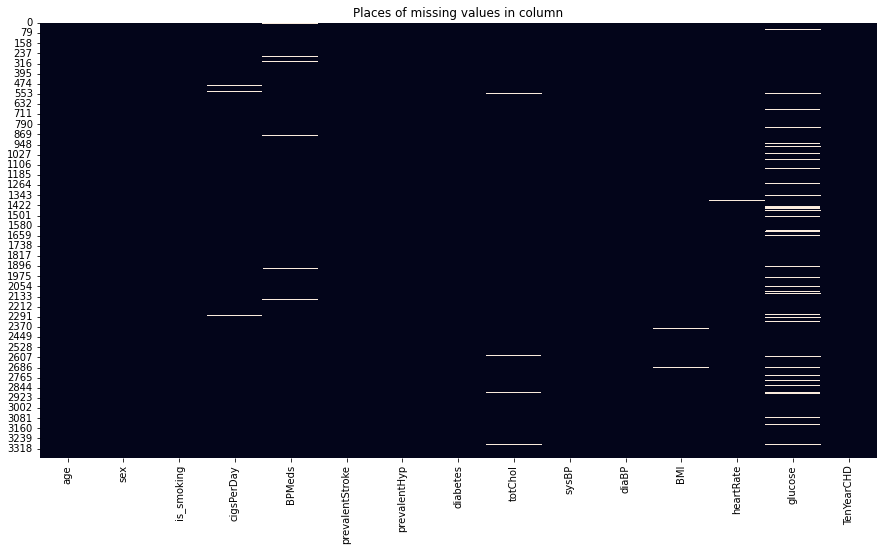

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Places of missing values in column')
sns.heatmap(df.isnull(), cbar=False, ax=ax)

In [18]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


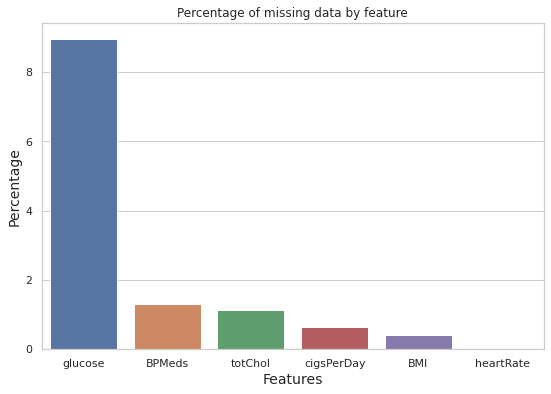

In [19]:
# Visualizing the percentage of missing data
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [20]:
# let's count the all rows which are having missing values 
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
# checking missing value percentage 
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  386
since it is only 11 percent of the entire dataset the rows with missing values are excluded.


At **8.97%**, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

Since the missing entries account for only **11%** of the total data so, we can drop these entries without losing alot of data.

In [21]:
# Excluding the missing values
df.dropna(axis=0,inplace=True)

In [22]:
# Now checking for missing values
df.isnull().any()

age                False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [23]:
# Checking for any duplicate values 
len(df[df.duplicated()])

0

In [24]:
# statistical measures about the data
df.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,49.521305,0.448402,0.492676,9.078562,0.030293,0.005992,0.314913,0.027297,237.222370,132.591711,82.923103,25.824041,75.816911,81.993009,0.152130
std,8.595076,0.497413,0.500030,11.890855,0.171421,0.077189,0.464559,0.162974,45.267516,22.270882,12.038348,4.121130,11.937110,24.125814,0.359207
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.057500,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.072500,83.000000,87.000000,0.000000
max,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


The features described in the above data set are:

1. **Count:** tells us the number of NoN-empty rows in a feature.

2. **Mean:** tells us the mean value of that feature.

3. **Std:** tells us the Standard Deviation Value of that feature.

4. **Min:** tells us the minimum value of that feature.

5. **25%, 50%, and 75%:** are the percentile/quartile of each features.

6. **Max:** tells us the maximum value of that feature.

**Data Distribution**

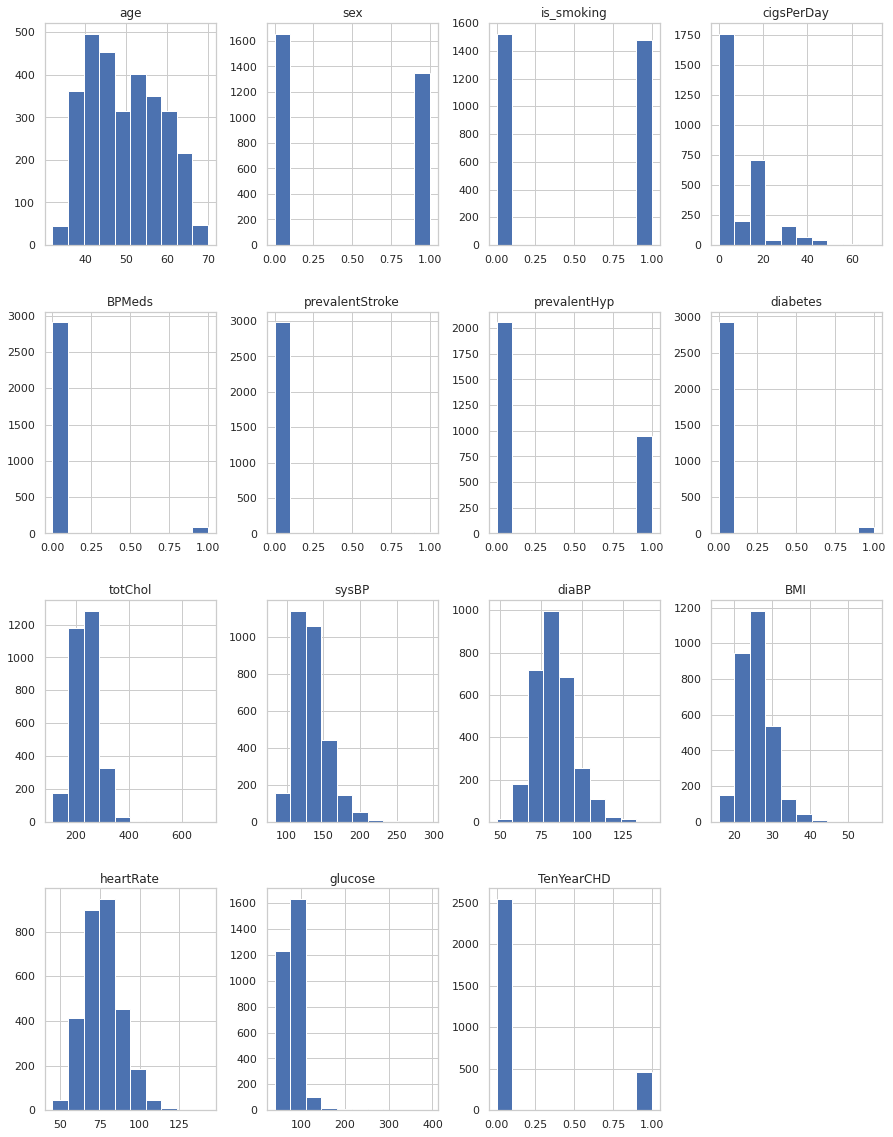

In [25]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

From above distribution plot we can say that the data on the **prevalent stroke**, **diabetes**, and **blood pressure** meds are poorly balanced.